In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.datasets import mnist
from keras.callbacks import CSVLogger

import numpy as np
import matplotlib.pyplot as plt

# Para reprodutibilidade básica
np.random.seed(42)

### 2) Carrega oo dataset

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train:", x_train.shape, " | y_train:", y_train.shape)
print("x_test :", x_test.shape,  " | y_test :", y_test.shape)

x_train: (60000, 28, 28)  | y_train: (60000,)
x_test : (10000, 28, 28)  | y_test : (10000,)


### 3) Visualizar algumas imagens do treino

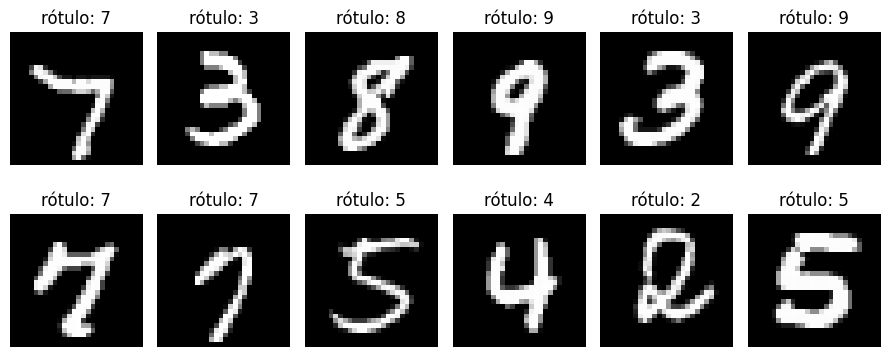

In [ ]:
# Mostra imagens aleatórias do conjunto de treino
n_rows, n_cols = 2, 6
idx = np.random.choice(len(x_train), n_rows * n_cols, replace=False)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 4))
for ax, i in zip(axes.ravel(), idx):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"rótulo: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### 4) Visualizar algumas imagens do teste

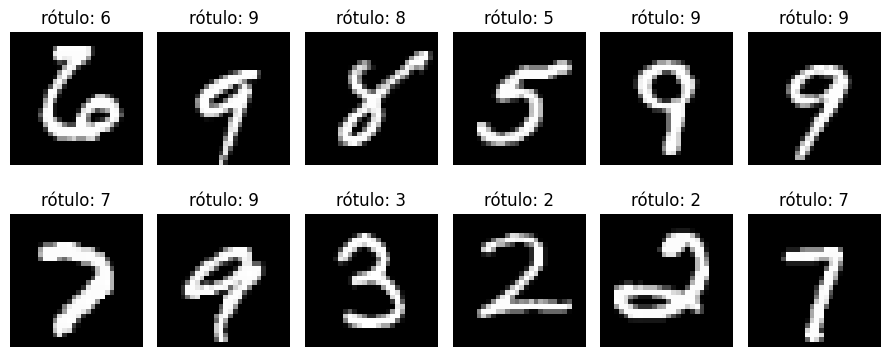

In [ ]:
# Mostra imagens aleatórias do conjunto de teste
n_rows, n_cols = 2, 6
idx = np.random.choice(len(x_test), n_rows * n_cols, replace=False)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(9, 4))
for ax, i in zip(axes.ravel(), idx):
    ax.imshow(x_test[i], cmap='gray')
    ax.set_title(f"rótulo: {y_test[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [37]:
x_train.shape[1:]

(28, 28)

### 5) Definir, compilar e treinar o modelo (com CSVLogger)

In [34]:
modelo = Sequential()
modelo.add(Flatten(input_shape=x_train.shape[1:]))  # (28, 28)
modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.1))
modelo.add(Dense(10, activation='softmax'))

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Cria o logger (usa tab como separador e grava .txt)
csv_logger = CSVLogger('treino.txt', separator='\t', append=False)

hist = modelo.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[csv_logger],
    verbose=2
)

loss, accuracy = modelo.evaluate(x_test, y_test, verbose=0)
print(f"Acurácia do modelo centralizado: {accuracy:.4f}")

/home/joahannes/project/minicurso/venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9207 - loss: 0.2740 - val_accuracy: 0.9586 - val_loss: 0.1393
Epoch 2/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9633 - loss: 0.1252 - val_accuracy: 0.9679 - val_loss: 0.1036
Epoch 3/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9727 - loss: 0.0911 - val_accuracy: 0.9745 - val_loss: 0.0826
Epoch 4/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9784 - loss: 0.0708 - val_accuracy: 0.9753 - val_loss: 0.0766
Epoch 5/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9812 - loss: 0.0597 - val_accuracy: 0.9764 - val_loss: 0.0818
Epoch 6/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9843 - loss: 0.0504 - val_accuracy: 0.9772 - val_loss: 0.0717
Epoch 7/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9862 - loss: 0.0433 - val_accuracy: 0.9782 - val_loss: 0.0776
Epoch 8/10
1875/1875 - 4s - 2ms/step - accuracy: 0.9880 - loss: 0.0376 - val_accuracy: 0.9795 - val_loss: 0.0683
Epoch 9/10
1875/1875 - 3s - 2ms/step - accuracy: 0.9887 - loss: 0.0334 - val_accuracy: 0.9788 - 

### 6) Visualizar curvas de treinamento

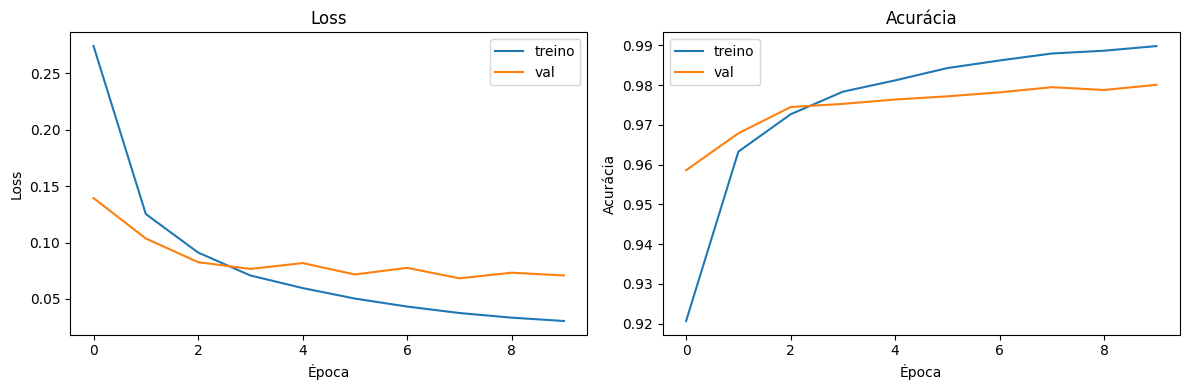

In [36]:
# Plota loss e acurácia de treino/validação
hist_dict = hist.history

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Loss
ax[0].plot(hist_dict['loss'], label='treino')
ax[0].plot(hist_dict['val_loss'], label='val')
ax[0].set_title('Loss')
ax[0].set_xlabel('Época')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Acurácia
ax[1].plot(hist_dict['accuracy'], label='treino')
ax[1].plot(hist_dict['val_accuracy'], label='val')
ax[1].set_title('Acurácia')
ax[1].set_xlabel('Época')
ax[1].set_ylabel('Acurácia')
ax[1].legend()

plt.tight_layout()
plt.show()